<a href="https://colab.research.google.com/github/Alamein/ArewaDS-Deep-Learning/blob/main/week_005/week_5_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Arewa Data Science Academy**

### **Deep Learning Cohort1.0**

### **Name: Aminu Hamza Nababa**

### **Email: alaminhnab4@gmail.com**

### **Title: Week 5 Solution**

### **Exercises Solution**

1. Our models are underperforming (not fitting the data well). What are 3 methods for preventing underfitting? Write them down and explain each with a sentence.

###1. Increase Model Complexity:

**Explanation:** Boost model complexity (add layers, increase polynomial degree, or use a more complex algorithm) to capture intricate data patterns for better training fit.

###2. Feature Engineering:

**Explanation:** Improve model learning by selecting or transforming features. This involves adding new ones, removing irrelevant ones, or transforming existing features to represent underlying data relationships.

###3. Adjust Hyperparameters:

**Explanation:** Optimize model performance by tuning key hyperparameters (learning rate, regularization strength, etc.). This helps mitigate underfitting, such as increasing learning rate in gradient boosting or reducing regularization strength in linear models.


2. Recreate the data loading functions we built in sections 1, 2, 3 and 4. You should have train and test DataLoader's ready to use.

In [2]:
# working libraries for getting the data
import zipfile
import requests
from pathlib import Path

""" uncomment the codes to make the
data directory."""
# make dir for the data mkdir
data_dir = Path("data/")
image_dir = data_dir / "data_folder"

# if image_dir.is_dir():
#   print(f"{image_dir} directory exists.")
# else:
#   print(f"Did not find {image_dir} directory, creating...")
#   image_dir.mkdir(parents=True, exist_ok=True)
# Download images data from GitHub
with open(data_dir / "data_folder.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloding data ⬇️")
  f.write(request.content)

# Unzip data
with zipfile.ZipFile(data_dir/"data_folder.zip", "r") as zip_ref:
  print(f"Unzipping data folder to {image_dir}")
  zip_ref.extractall(image_dir)

Did not find data/data_folder directory, creating...
Downloding data ⬇️
Unzipping data folder to data/data_folder


data/data_folder/train
data/data_folder/test
[PosixPath('data/data_folder/test/sushi/2190404.jpg'), PosixPath('data/data_folder/test/sushi/2385731.jpg'), PosixPath('data/data_folder/test/sushi/1245193.jpg'), PosixPath('data/data_folder/test/sushi/499605.jpg'), PosixPath('data/data_folder/test/sushi/175783.jpg'), PosixPath('data/data_folder/test/sushi/2276986.jpg'), PosixPath('data/data_folder/test/sushi/2540511.jpg'), PosixPath('data/data_folder/test/sushi/479711.jpg'), PosixPath('data/data_folder/test/sushi/1987407.jpg'), PosixPath('data/data_folder/test/sushi/1600999.jpg'), PosixPath('data/data_folder/test/sushi/988559.jpg'), PosixPath('data/data_folder/test/sushi/2394442.jpg'), PosixPath('data/data_folder/test/sushi/684266.jpg'), PosixPath('data/data_folder/test/sushi/858157.jpg'), PosixPath('data/data_folder/test/sushi/3806282.jpg'), PosixPath('data/data_folder/test/sushi/343036.jpg'), PosixPath('data/data_folder/test/sushi/3196729.jpg'), PosixPath('data/data_folder/test/sushi/1742

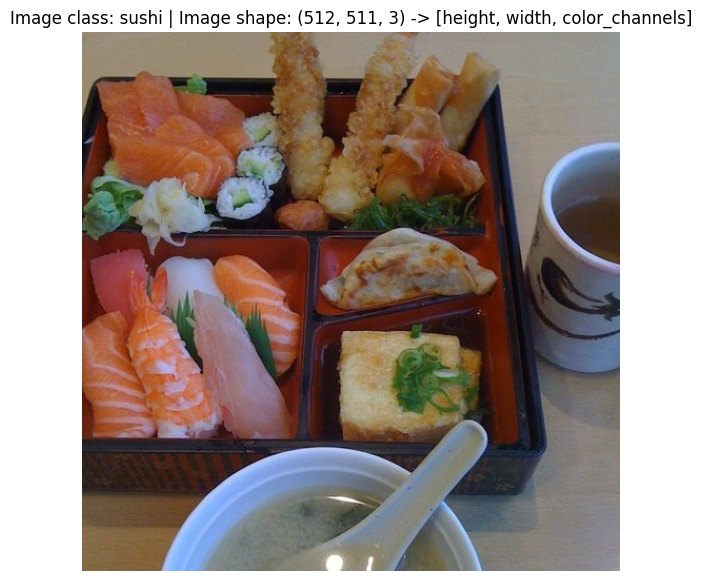

In [3]:
# train and test path
train_dir = image_dir / "train"
test_dir = image_dir / "test"

print(train_dir)
print(test_dir)

# prepare the data for visualization/other inseight
#impor working libararies
import random
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
image_path_list = list(image_dir.glob("*/*/*.jpg")) # image path lists
print(image_path_list)
random_image_path = random.choice(image_path_list) # ramdom paths
print(random_image_path)
image_class = random_image_path.parent.stem # images class
print(image_class)
img = Image.open(random_image_path)
print(img)
img_as_array = np.asarray(img)

# Visualize/Plot the image with plt
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

In [5]:
"""A_1. Transform the data into tensors.
A_1_a. Transforming data with torchvision.transforms: a_1. resize the images,
a_2. flip the images ramdomly on horizontal
a_3. turn the images into a torch.Tensor
 """
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

data_transform = transforms.Compose([
  # a_1
  transforms.Resize(size=(64, 64)),
  # a_2
  transforms.RandomHorizontalFlip(p=0.5),
  # a_3
  transforms.ToTensor()
])

random.sample(image_path_list, k=3)

[PosixPath('data/data_folder/train/sushi/148799.jpg'),
 PosixPath('data/data_folder/train/steak/2603058.jpg'),
 PosixPath('data/data_folder/test/pizza/2124579.jpg')]

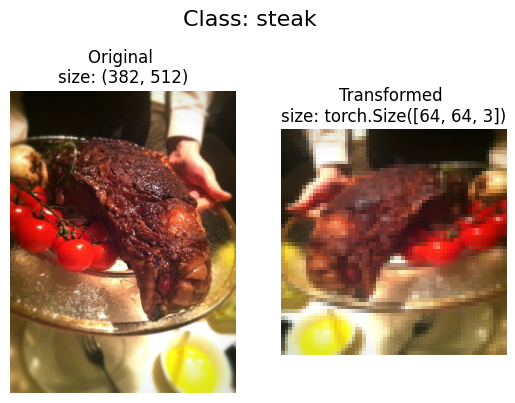

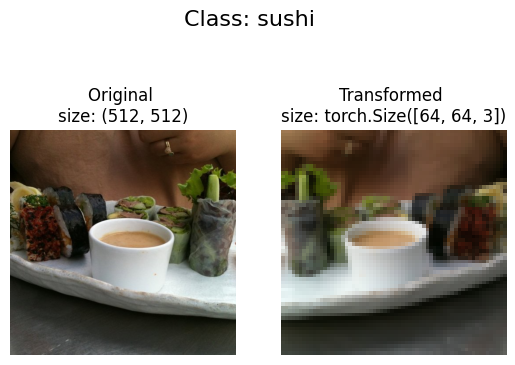

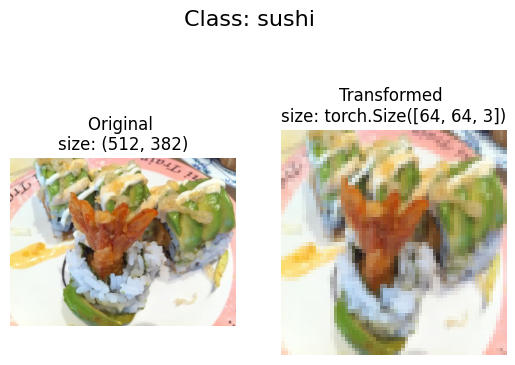

In [6]:
#imgaes transform ploat
def plot_transformed_images(image_paths, transform, n=3, seed=42):
  """Plots a series of random images from image_dir/images_pths."""
  random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original \nsize: {f.size}")
      ax[0].axis("off")

      # Transform and plot image
      # permute() the image to make sure it's compatible with matplotlib
      transformed_image = transform(f).permute(1, 2, 0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed \nsize: {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3)

In [7]:
# create datasets in the images folder
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform,
                                 target_transform=None)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/data_folder/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/data_folder/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [10]:
class_names = train_data.classes
print(class_names)
class_dict = train_data.class_to_idx
print(class_dict)

# Turn train and test Datasets into DataLoaders
import os
from torch.utils.data import DataLoader
BATCH_SIZE = 1
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=os.cpu_count(),
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=os.cpu_count(),
                             shuffle=False)

train_dataloader, test_dataloader

['pizza', 'steak', 'sushi']
{'pizza': 0, 'steak': 1, 'sushi': 2}


(<torch.utils.data.dataloader.DataLoader at 0x7e1a91a0fe50>,
 <torch.utils.data.dataloader.DataLoader at 0x7e1a91a0ed40>)

3. Recreate model_0 we built in section 7.

In [12]:
import torch
from torch import nn
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f'Device: {device}')

class TinyVGG(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*16*16,
                  out_features=output_shape))

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(f"Layer 1 shape: {x.shape}")
    x = self.conv_block_2(x)
    # print(f"Layer 2 shape: {x.shape}")
    x = self.classifier(x)
    # print(f"Layer 3 shape: {x.shape}")
    return x

model_0 = TinyVGG(input_shape = 3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)
model_0

Device: cpu


TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [13]:
print(len(class_names))
# Pass dummy data through model
dummy_x = torch.rand(size=[1, 3, 64, 64])
model_0(dummy_x.to(device))

3


tensor([[-0.0311, -0.0308,  0.0359]], grad_fn=<AddmmBackward0>)

4. Create training and testing functions for model_0.

In [16]:
# I adopt the styles below


def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):

  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader and data batches
  for batch, (X, y) in enumerate(dataloader):
    # Send data to target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X)
    # print(y_pred)

    # 2. Calculate and accumulate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate and accumualte accuracy metric across all batches
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)

  # Adjust metrics to get average loss and average accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

In [15]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):

  # Put model in eval mode
  model.eval()

  # Setup the test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():
    # Loop through DataLoader batches
    for batch, (X, y) in enumerate(dataloader):
      # Send data to target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred_logits = model(X)
      # print(test_pred_logits)

      # 2. Calculuate and accumulate loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # Calculate and accumulate accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

In [17]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

  # Create results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # Loop through the training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    # Train step
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)
    # Test step
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)

    # Print out what's happening
    print(f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
    )

    # Update the results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # Return the results dictionary
  return results

5. Try training the model you made in exercise 3 for 5, 20 and 50 epochs, what happens to the results?

In [18]:
# Train for 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

loss_fn=nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.001)

model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        epochs=5)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1179 | train_acc: 0.2800 | test_loss: 1.0960 | test_acc: 0.3733
Epoch: 2 | train_loss: 1.1010 | train_acc: 0.3244 | test_loss: 1.0996 | test_acc: 0.2533
Epoch: 3 | train_loss: 1.0993 | train_acc: 0.2933 | test_loss: 1.0998 | test_acc: 0.3333
Epoch: 4 | train_loss: 1.0999 | train_acc: 0.3289 | test_loss: 1.1003 | test_acc: 0.3333
Epoch: 5 | train_loss: 1.0993 | train_acc: 0.3511 | test_loss: 1.1007 | test_acc: 0.3333


In [19]:
# Train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1.parameters(), lr=0.001)

model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        epochs=20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1179 | train_acc: 0.2800 | test_loss: 1.0960 | test_acc: 0.3733
Epoch: 2 | train_loss: 1.1010 | train_acc: 0.3244 | test_loss: 1.0996 | test_acc: 0.2533
Epoch: 3 | train_loss: 1.0993 | train_acc: 0.2933 | test_loss: 1.0998 | test_acc: 0.3333
Epoch: 4 | train_loss: 1.0999 | train_acc: 0.3289 | test_loss: 1.1003 | test_acc: 0.3333
Epoch: 5 | train_loss: 1.0993 | train_acc: 0.3511 | test_loss: 1.1007 | test_acc: 0.3333
Epoch: 6 | train_loss: 1.0990 | train_acc: 0.3467 | test_loss: 1.1011 | test_acc: 0.3333
Epoch: 7 | train_loss: 1.0995 | train_acc: 0.3467 | test_loss: 1.1008 | test_acc: 0.3333
Epoch: 8 | train_loss: 1.0987 | train_acc: 0.3422 | test_loss: 1.1015 | test_acc: 0.3333
Epoch: 9 | train_loss: 1.0988 | train_acc: 0.3467 | test_loss: 1.1014 | test_acc: 0.3333
Epoch: 10 | train_loss: 1.0988 | train_acc: 0.3467 | test_loss: 1.1015 | test_acc: 0.3333
Epoch: 11 | train_loss: 1.0989 | train_acc: 0.3467 | test_loss: 1.1021 | test_acc: 0.3333
Epoch: 12 | train_l

In [20]:
# Train for 50 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_2 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.001)

model_2_results = train(model=model_2,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        epochs=50)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1179 | train_acc: 0.2800 | test_loss: 1.0960 | test_acc: 0.3733
Epoch: 2 | train_loss: 1.1010 | train_acc: 0.3244 | test_loss: 1.0996 | test_acc: 0.2533
Epoch: 3 | train_loss: 1.0993 | train_acc: 0.2933 | test_loss: 1.0998 | test_acc: 0.3333
Epoch: 4 | train_loss: 1.0999 | train_acc: 0.3289 | test_loss: 1.1003 | test_acc: 0.3333
Epoch: 5 | train_loss: 1.0993 | train_acc: 0.3511 | test_loss: 1.1007 | test_acc: 0.3333
Epoch: 6 | train_loss: 1.0990 | train_acc: 0.3467 | test_loss: 1.1011 | test_acc: 0.3333
Epoch: 7 | train_loss: 1.0995 | train_acc: 0.3467 | test_loss: 1.1008 | test_acc: 0.3333
Epoch: 8 | train_loss: 1.0987 | train_acc: 0.3422 | test_loss: 1.1015 | test_acc: 0.3333
Epoch: 9 | train_loss: 1.0988 | train_acc: 0.3467 | test_loss: 1.1014 | test_acc: 0.3333
Epoch: 10 | train_loss: 1.0988 | train_acc: 0.3467 | test_loss: 1.1015 | test_acc: 0.3333
Epoch: 11 | train_loss: 1.0989 | train_acc: 0.3467 | test_loss: 1.1021 | test_acc: 0.3333
Epoch: 12 | train_l

6. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results?

In [21]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_3 = TinyVGG(input_shape=3,
                  hidden_units=20,
                  output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_3.parameters(), lr=0.001)

model_3_results = train(model=model_3,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        epochs=20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0995 | train_acc: 0.3689 | test_loss: 1.0825 | test_acc: 0.3467
Epoch: 2 | train_loss: 1.0484 | train_acc: 0.4489 | test_loss: 1.0402 | test_acc: 0.4933
Epoch: 3 | train_loss: 0.9681 | train_acc: 0.5244 | test_loss: 0.9637 | test_acc: 0.4533
Epoch: 4 | train_loss: 0.8791 | train_acc: 0.6178 | test_loss: 0.9756 | test_acc: 0.4800
Epoch: 5 | train_loss: 0.8781 | train_acc: 0.5956 | test_loss: 0.9887 | test_acc: 0.4267
Epoch: 6 | train_loss: 0.8468 | train_acc: 0.6356 | test_loss: 0.9767 | test_acc: 0.4800
Epoch: 7 | train_loss: 0.8403 | train_acc: 0.6400 | test_loss: 1.0069 | test_acc: 0.5067
Epoch: 8 | train_loss: 0.7671 | train_acc: 0.6578 | test_loss: 0.9913 | test_acc: 0.4933
Epoch: 9 | train_loss: 0.7312 | train_acc: 0.6889 | test_loss: 1.0127 | test_acc: 0.4533
Epoch: 10 | train_loss: 0.7279 | train_acc: 0.6844 | test_loss: 1.0202 | test_acc: 0.4533
Epoch: 11 | train_loss: 0.7131 | train_acc: 0.6933 | test_loss: 1.0134 | test_acc: 0.5200
Epoch: 12 | train_l

Even with the amount of hidden units changed, it appears that the model remains overfitting.

We'd need to investigate techniques to stop our model from overfitting in order to address this.

7. Double the data you're using with your model and train it for 20 epochs, what happens to the results?

In [22]:
# mkdir for the data
data_path = Path("data/")
image_path = data_path / "datasets_20_percent"

''' uncomment to asscess it...!
# if image_path.is_dir():
#     print(f"{image_path} directory exists.")
# else:
#     print(f"Did not find {image_path} directory, creating one...")
#     image_path.mkdir(parents=True, exist_ok=True)

# # Download pizza, steak, sushi data
# with open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
#     request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
#     print("Downloading datasets ⬇️")
#     f.write(request.content)

# # Unzip pizza, steak, sushi data
# with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
#     print("Unzipping pizza, steak, sushi 20% data...")
#     zip_ref.extractall(image_path)'''

Did not find data/datasets_20_percent directory, creating one...
Unzipping pizza, steak, sushi 20% data...


In [23]:
train_data_20_percent_path = image_path / "train"
test_data_20_percent_path = image_path / "test"

train_data_20_percent_path, test_data_20_percent_path

(PosixPath('data/datasets_20_percent/train'),
 PosixPath('data/datasets_20_percent/test'))

In [26]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

simple_transform = transforms.Compose([
  transforms.Resize((64, 64)),
  transforms.ToTensor()
])

train_data_20_percent = ImageFolder(train_data_20_percent_path,
                                    transform=simple_transform)

test_data_20_percent = ImageFolder(test_data_20_percent_path,
                                   transform=simple_transform)

# Create dataloaders
train_dataloader_20_percent = DataLoader(train_data_20_percent,
                                         batch_size=32,
                                         num_workers=os.cpu_count(),
                                         shuffle=True)

test_dataloader_20_percent = DataLoader(test_data_20_percent,
                                        batch_size=32,
                                        num_workers=os.cpu_count(),
                                        shuffle=False)

In [25]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_4 = TinyVGG(input_shape=3,
                  hidden_units=20,
                  output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_4.parameters(), lr=0.001)

model_4_results = train(model=model_4,
                        train_dataloader=train_dataloader_20_percent,
                        test_dataloader=test_dataloader_20_percent,
                        optimizer=optimizer,
                        epochs=20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1042 | train_acc: 0.3312 | test_loss: 1.1005 | test_acc: 0.2875
Epoch: 2 | train_loss: 1.0838 | train_acc: 0.3583 | test_loss: 1.0697 | test_acc: 0.3858
Epoch: 3 | train_loss: 1.0273 | train_acc: 0.4500 | test_loss: 0.9528 | test_acc: 0.5722
Epoch: 4 | train_loss: 0.9235 | train_acc: 0.5583 | test_loss: 0.9162 | test_acc: 0.5722
Epoch: 5 | train_loss: 0.8648 | train_acc: 0.6521 | test_loss: 0.9192 | test_acc: 0.5455
Epoch: 6 | train_loss: 0.8384 | train_acc: 0.6396 | test_loss: 1.0324 | test_acc: 0.4903
Epoch: 7 | train_loss: 0.9034 | train_acc: 0.5708 | test_loss: 0.8969 | test_acc: 0.4932
Epoch: 8 | train_loss: 0.7646 | train_acc: 0.6667 | test_loss: 0.9066 | test_acc: 0.5824
Epoch: 9 | train_loss: 0.7828 | train_acc: 0.6542 | test_loss: 0.9520 | test_acc: 0.5239
Epoch: 10 | train_loss: 0.8123 | train_acc: 0.6396 | test_loss: 0.9111 | test_acc: 0.5795
Epoch: 11 | train_loss: 0.7513 | train_acc: 0.6667 | test_loss: 0.8614 | test_acc: 0.6284
Epoch: 12 | train_l